In [1]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset into a pandas dataframe
loans = pd.read_csv("../data/loan_data.csv")
loans.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
# summarize dataset info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# compare approved(1)/not approved(0) proportions
loans["loan_status"].value_counts(normalize=True).round(2)

loan_status
0    0.78
1    0.22
Name: proportion, dtype: float64

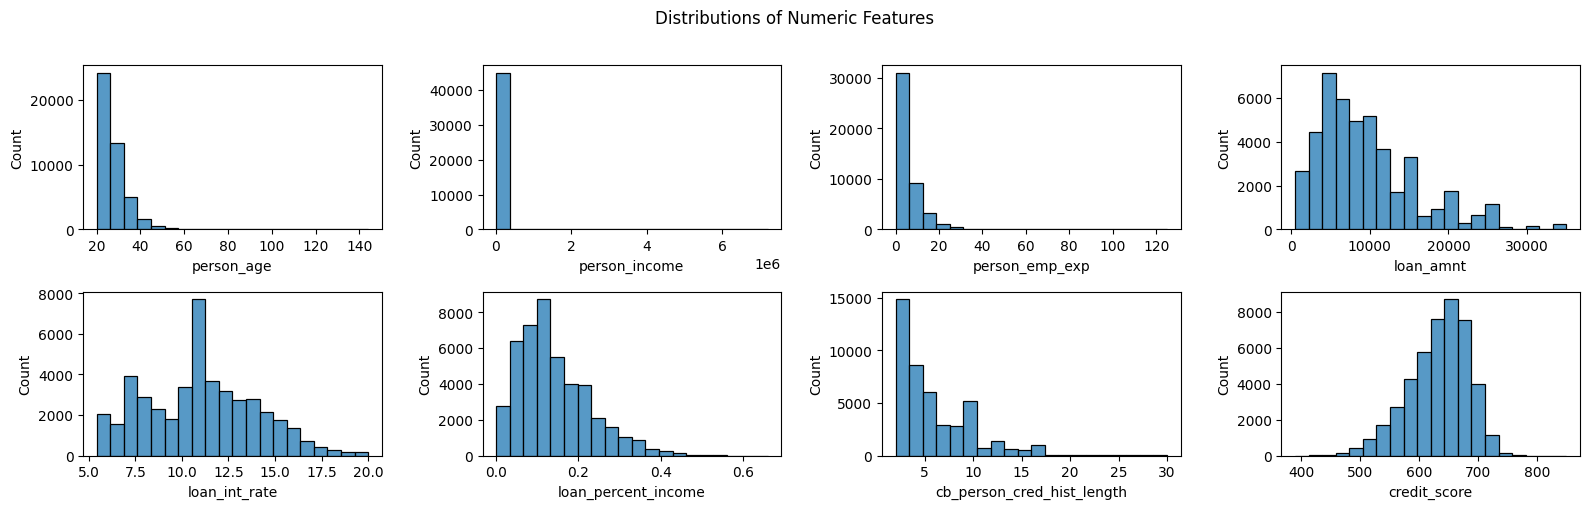

In [5]:
# visualize distributions of numeric features
numerical_features = loans.select_dtypes(exclude="object").columns[:-1]

fig, ax = plt.subplots(2, 4, figsize=(16, 5))
fig.suptitle("Distributions of Numeric Features", y=1.01)
for i, feat in zip(range(0, 8), numerical_features):
    sns.histplot(data=loans, x=feat, bins=20, ax=ax.flatten()[i])
plt.tight_layout()

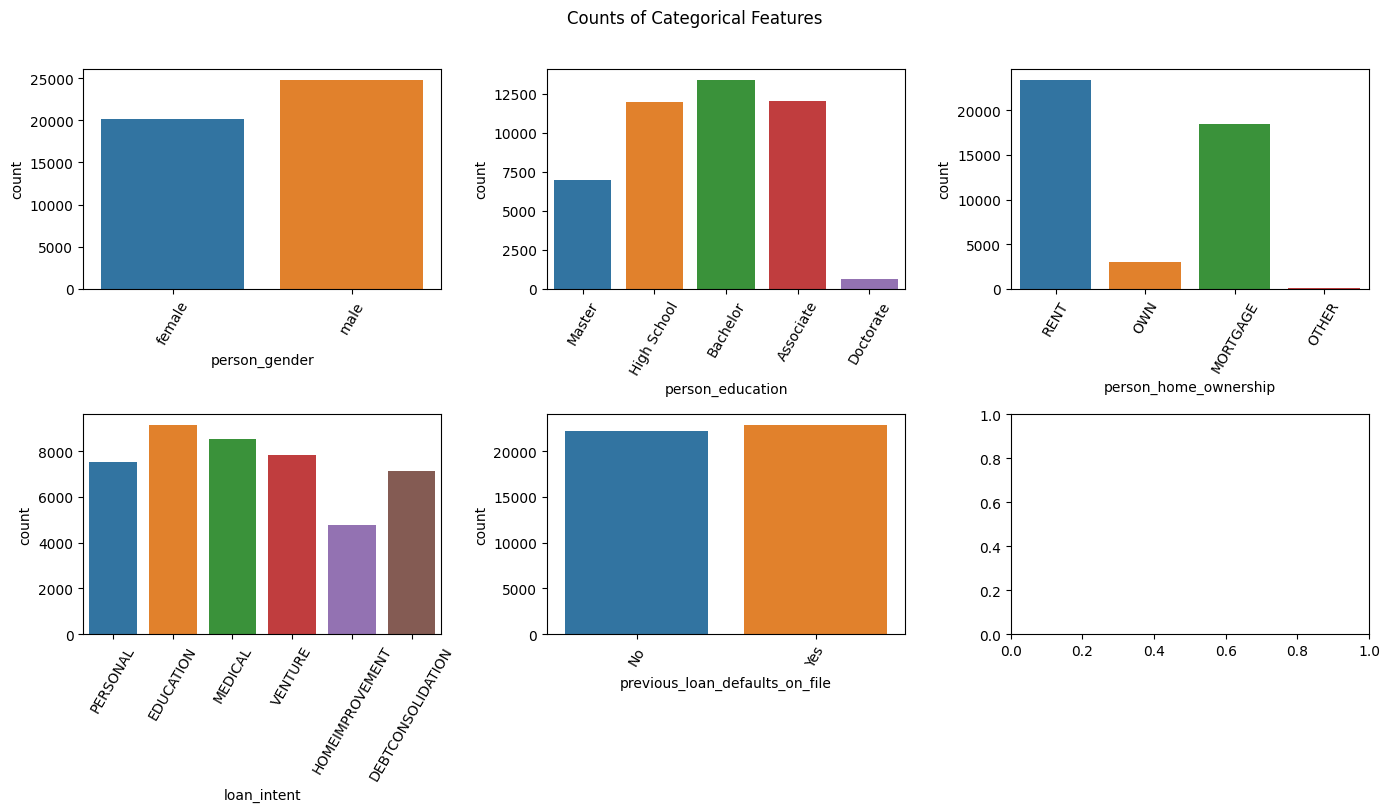

In [6]:
# visualize counts of categorical features
categorical_features = loans.select_dtypes(include="object").columns

fig, ax = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("Counts of Categorical Features", y=1.01)
for i, feat in zip(range(0, 5), categorical_features):
    sns.countplot(data=loans, x=feat, hue=feat, ax=ax.flatten()[i])
    ax.flatten()[i].tick_params(axis="x", rotation=60)
plt.tight_layout()

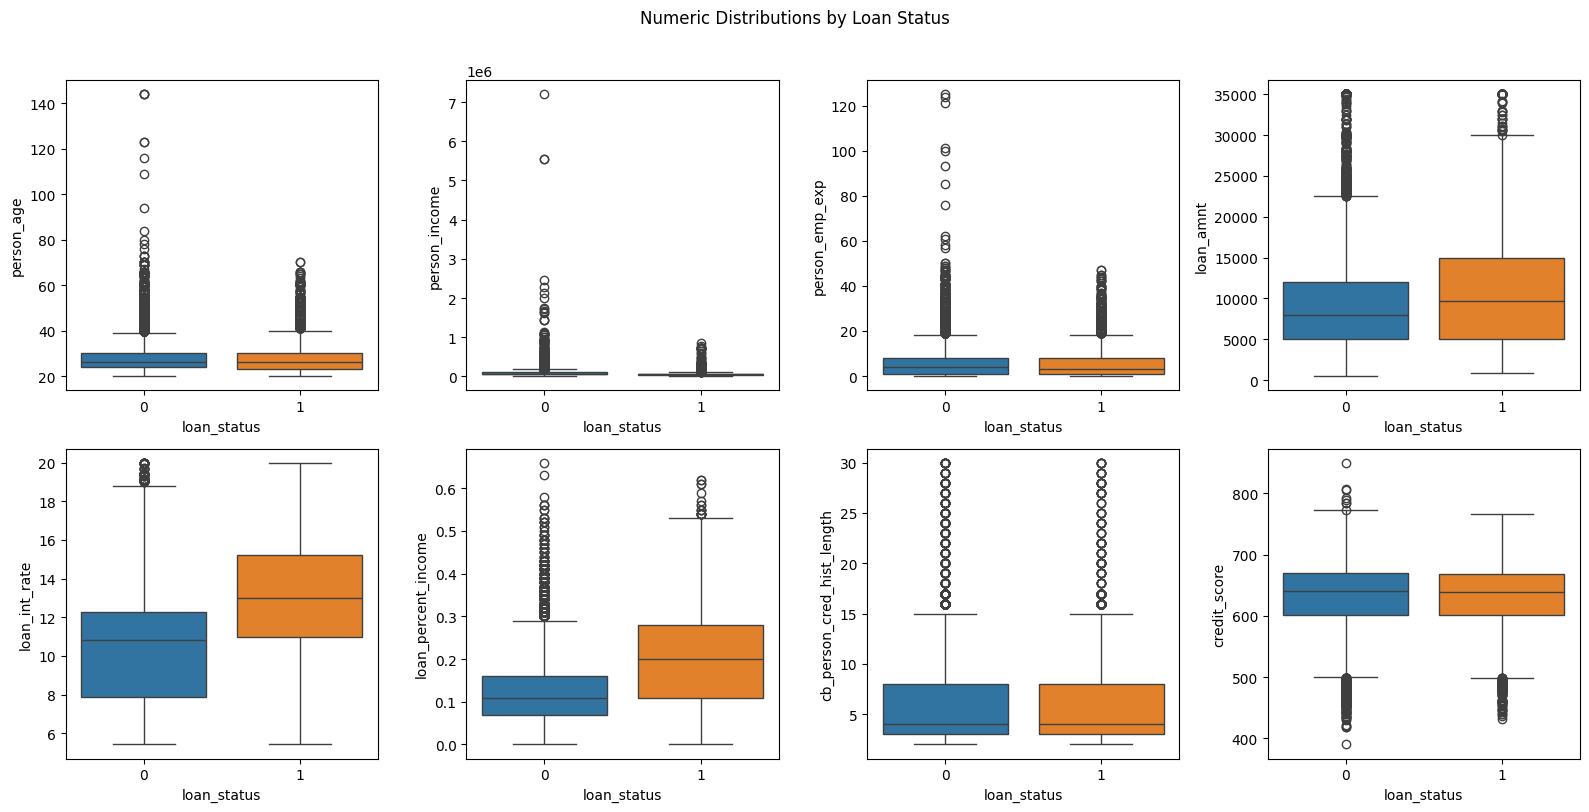

In [8]:
# visualize the distributions of numeric features by loan status
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
plt.suptitle("Numeric Distributions by Loan Status", y=1.01)

for i, feat in zip(range(0, 8), numerical_features):
    sns.boxplot(data=loans, x="loan_status", y=feat, hue="loan_status", legend=False, ax=ax.flatten()[i])
plt.tight_layout()

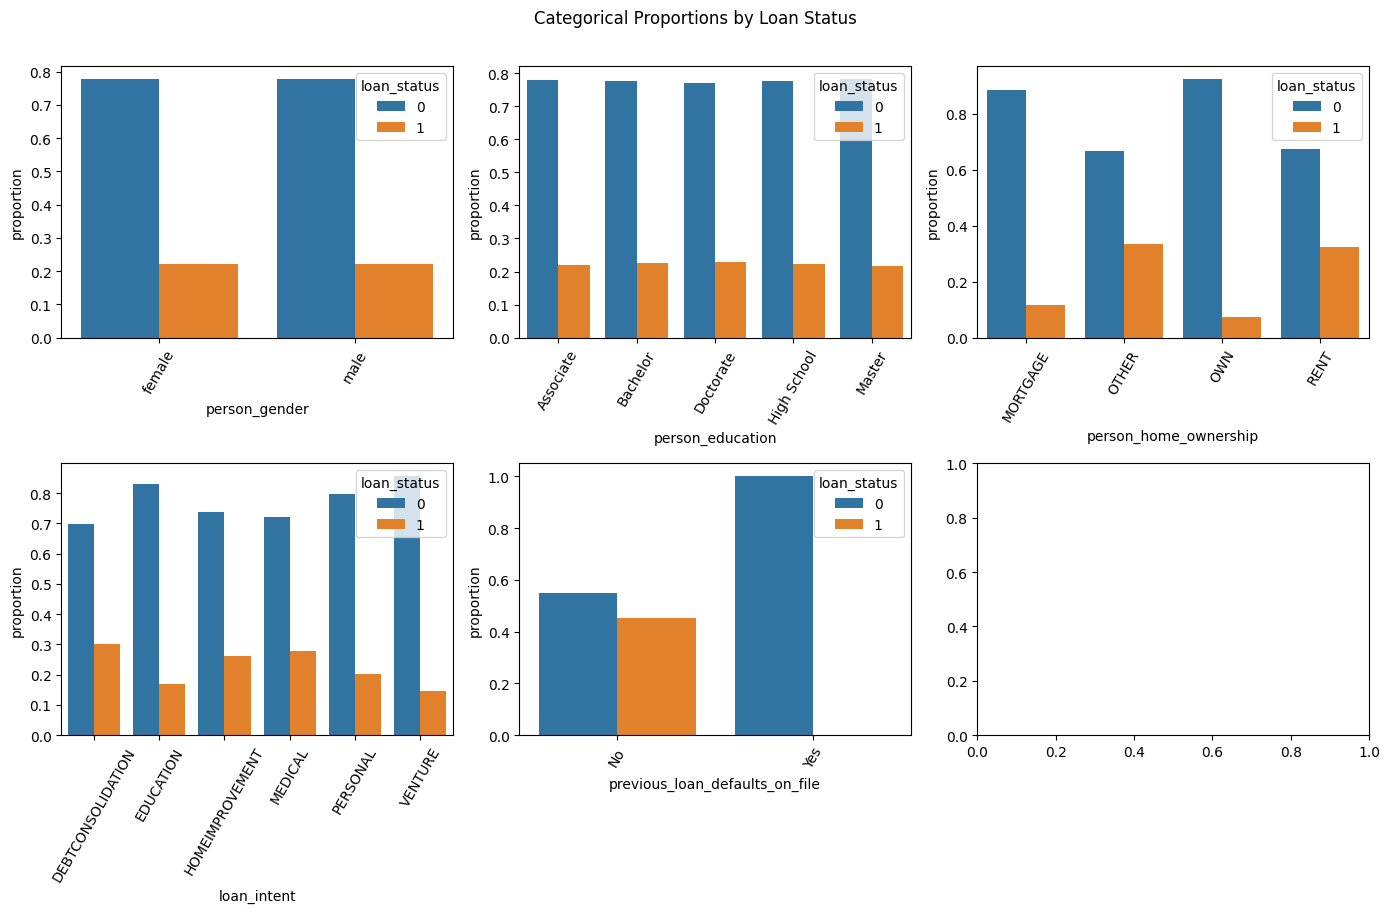

In [9]:
# visualize proportions of categorical features by loan status
fig, ax = plt.subplots(2, 3, figsize=(14, 9))
plt.suptitle("Categorical Proportions by Loan Status", y=1.01)

for i, feat in zip(range(0, 5), categorical_features):
    grouped_data = loans.groupby([feat, "loan_status"]).size().reset_index(name="counts")
    grouped_data["total"] = grouped_data.groupby(feat)["counts"].transform("sum")
    grouped_data["proportion"] = grouped_data["counts"] / grouped_data["total"]
    sns.barplot(data=grouped_data, x=feat, y="proportion", hue="loan_status", ax=ax.flatten()[i])
    ax.flatten()[i].tick_params(axis="x", rotation=60)
    
plt.tight_layout()

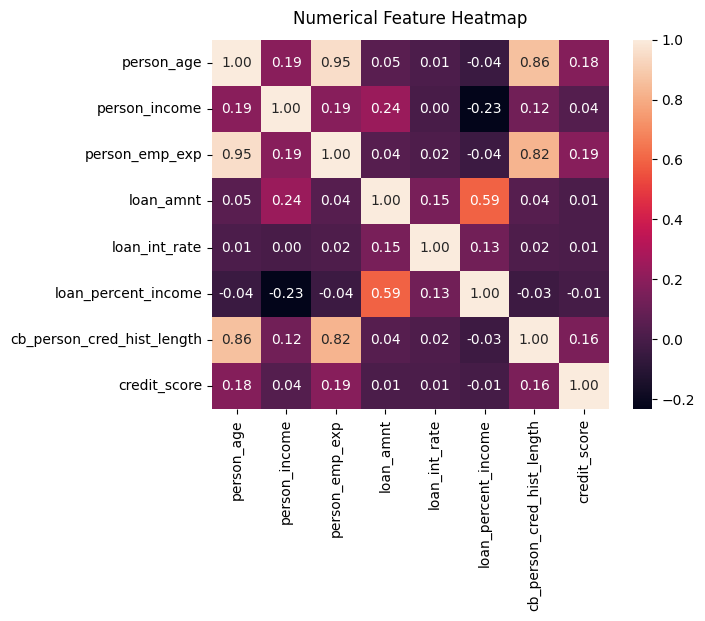

In [10]:
# visualize numeric feature correlations
sns.heatmap(loans[numerical_features].corr(), annot=True, fmt=".2f")
plt.title("Numerical Feature Heatmap", y=1.02);